# Biological Imaging Systems:  Image Analysis and Processing

__Lecturer__: Dr. Papadakis Vassilis 

# Project 2:
Christina Chatzipantsiou

## Project Description

#### Generic Description 
The proposed project should be a complete solution, written in python using opencv. It should include a dialog for the input images and another dialog to request for information regarding the algorithm’s parameters (if necessary). 
Together with the code, a fully detailed report should be provided including the example images, the description of how the algorithm works, and the final results. A discussion related to the expectations and deviations should be included. 
#### Project
Create an algorithm that will be counting the objects and measure the center of mass and surface of each object on the given image. The algorithm should provide two maps with the above measurements and save them to the HDD. Following the algorithm should crop each object from the image and save it on the HDD inside a folder, with filename based on the object number (>400 files).


## Introduction

Fluorensence microscopy is routinely used in molecular biology laboratories for capturing the morphology and population size of cell colonies or cells from tissue samples. After the aqcuisition of the pictures, the traditionally burdensome and time consuming part of the analysis follows up. Software applications of computer vision have helped minimize the demand for hands-on quantitative and qualitative evaluation of the images. For current project, we will create a python script that addresses a very common set of tasks for the analysis of a fluoresence microscopy image of cells. In order to be able to count the number of cells, locate their center of mass and find the surface area we will be mostly using a well-established library for computer vision analyses, __`OpenCV`__, along with some other visualization and computer vision python libraries. The rationale behind the workflow that will be followed is to start with the original color image and end up with a processed, simplified version of it, which will be easier to analyze for the detection of the cell outlines (contours). For this, we will first convert the color image to greyscale, and subsequently, by applying thresholding, the image will be binarized, to black and white. <br> Thresholding is a type of image _segmentation_. Segmentation is the process of deciphering the pixels that correspond to the cell signal in an image. For example, segmentation by a single intensity threshold can be used to distinguish the cells from the background by partitioning the original image into two classes of pixels. In the binary image, after some morphological operations such as Gaussian blurring for reducing noise and maybe closing if needed, we will attempt to detect the cell outlines. Once the contours have been detected, we will locate the centroids (center of mass) and find the surface area using the `OpenCV` functions `cv2.findContours()`, `cv2.moments` and `cv2.contourArea`. Lastly, we will be cropping around each detected contour to retrieve a small image of the located cell and save the images to the hard drive. `OpenCV` includes built-in functions for those tasks as well. <br><br> In the following blocks, we will go through the aforementioned workflow step by step.






### DEPENDENCIES:

In [75]:
# DEPENDENCIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import imutils       # pip install imutils       | url: https://github.com/jrosebr1/imutils
import cv2           # pip install opencv-python | url: https://pypi.python.org/pypi/opencv-python
import mahotas as mh # conda install -c conda-forge mahotas 

## 0. Read image into a numpy ndarray 
First we need to load the image from the hard drive and read it into an ndarray. To facilitate the process we will store the full path of the input directory (where the image to be analyzed is stored), the name and filetype of the image. We will then reconstruct the full path for the specific image and use `cv2.imread(full_path_to_image)`. After the image has been loaded, we can explore some information about the image size, the onject in which the image is stored and the color channels.

In [77]:
# SET UP INPUT DIRECTORY, STORE NAMES OF IMAGES OF INTEREST:
input_dir            = "C:/Users/bruno/Dropbox/IMAGING_ELECTIVE2017/P2series/"
image_name           = "Figure2b"
image_file_type      =  ".png"
img_path             = str(input_dir) + str(image_name) + str(image_file_type)

#READ IMAGE  
img                  = cv2.imread(img_path)

print('Image dimensions:',  img.shape[0], 'x' , img.shape[1], 'pixels')
print('Image stored as :  ', type(img))
print('Image color channels:', img.shape[2])

Image dimensions: 649 x 860 pixels
Image stored as :   <class 'numpy.ndarray'>
Image color channels: 3


## Display image with `matplotlib.pyplot`


In order to use `pyplot` to display the image that we loaded with the `OpenCV` function `cv2.imread()` we have to convert from BGR (_OpenCV_) to RGB (_matplotlib_).

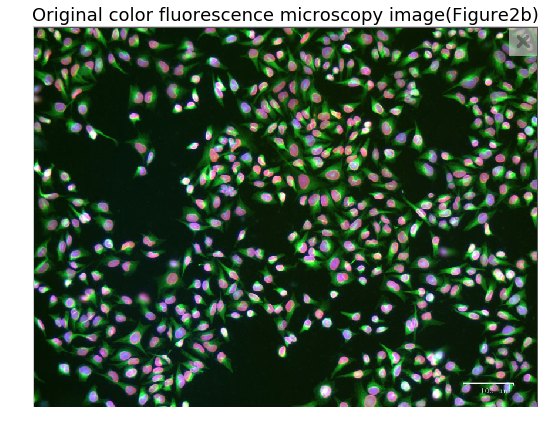

In [79]:
import matplotlib.pyplot as plt 

# Convert image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#adjust plot: https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


plt.axis("off")
plt.imshow(img_rgb)#https://stackoverflow.com/questions/43228246/show-grayscale-opencv-image-with-matplotlib
plt.title('Original color fluorescence microscopy image(Figure2b)', size = 18)
plt.show()  # display it

We notice in the image above that there are areas of __overlapping cells__, hence we should expect some clustered cells to share a single contour later on.
Also, we can see that the cell body is colored green, whereas the nuclei are red and blue.
Just for exploratory purposes on the morphology of the cells, we can split the image in each three color channels and display the blue, red and green image. Below, we will create the images, by assigning the values of the two channels that we want to cancel out equal to zero. In some operations, we might encounter zero devision error. To avoid that, instead of zero we will assign the 2 unwanted channels a very low intensity value, eg. `10`. The color will seem still true to the human eye, whilst handling potential errors in our code.


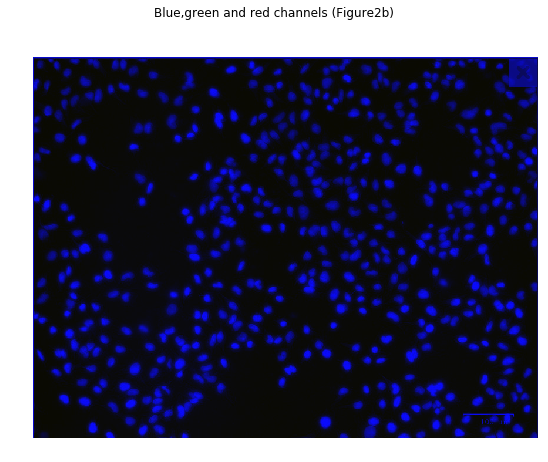

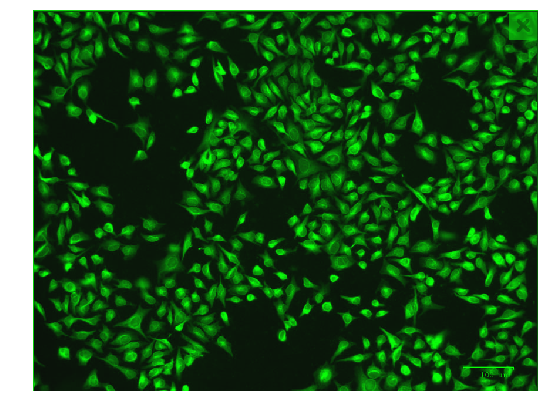

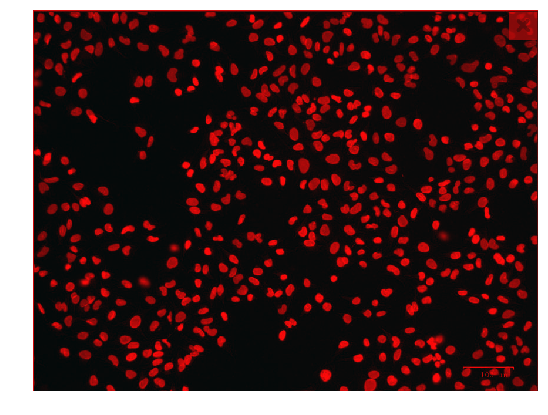

In [30]:
# Create blue, green and red images of the original  

# B
img_blue         = np.copy(img) 
img_blue[:,:,1]  = img_blue[:,:,2]  = 10 #set G = 0, R = 0, Leave only blue 
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
cv2.imwrite(str(input_dir) + 'img_blue.png', img_blue)


# G
img_green        = np.copy(img) 
img_green[:,:,0] = img_green[:,:,2] = 10 #set B = 0, R = 0, Leave only green
img_green = cv2.cvtColor(img_green, cv2.COLOR_BGR2RGB)
cv2.imwrite(str(input_dir) + 'img_green.png', img_green)

# R
img_red          = np.copy(img) 
img_red[:,:,0]   = img_red[:,:,1]   = 10 #set B = 0, G = 0, Leave only red 
img_red = cv2.cvtColor(img_red, cv2.COLOR_BGR2RGB)
cv2.imwrite(str(input_dir) + 'img_red.png', img_red)


import matplotlib.pylab as plt
# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


plt.suptitle('Blue,green and red channels (Figure2b)')
plt.axis("off")
plt.imshow(img_blue)
plt.show()

plt.axis("off")
plt.imshow(img_green)
plt.show()

plt.axis("off")
plt.imshow(img_red)
plt.show()



## 1. Pre-processing and Morphological operations


Before proceeding with the contour detection, we will apply some pre-processing to the image. Firstly, we will __1) convert the BGR color image to grayscale__. Then we will use a __2)Gaussian filter__ for blurring the image and remove noise. We will use a 5 x 5 kernel and the built-in `OpenCV` function `cv2.GaussianBlur` on the grayscale image. Usually we select square and odd kernel sizes, because thisi way we can have the pixel to be transformed in the center of the kernel.  Lastly, we will use __3) thresholding__ to binarize the blurred grayscale image and convert it to black and white. The minimum value for the threshold has been selected manually by inspecting manually the intensities of the cells'  border pixels. 

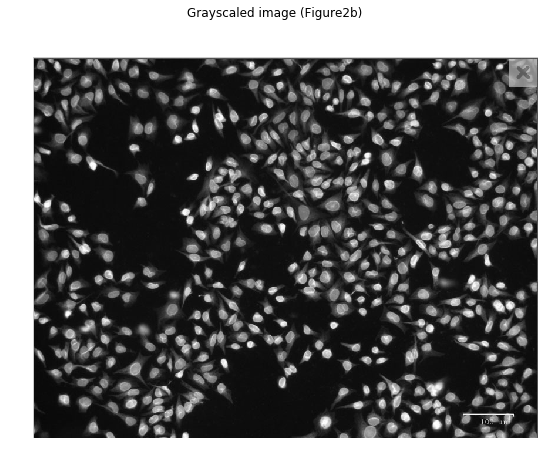

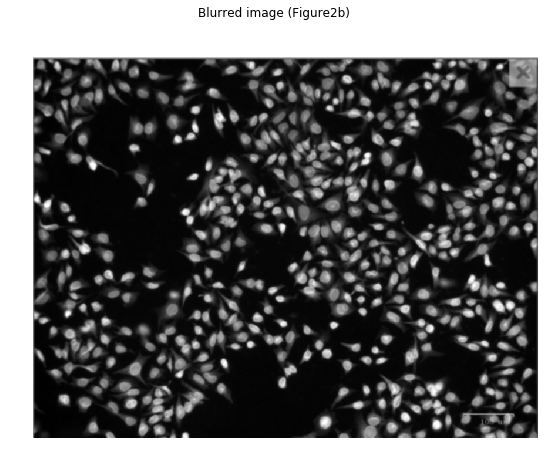

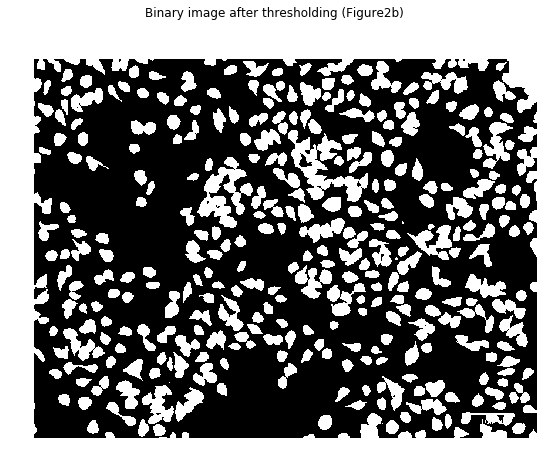

In [35]:
#1. Convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#2. Apply Gaussian Filter
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#3. Thresholding to binarize
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]  # min value  = 60, manual inspection of pixels

import matplotlib.pylab as plt
# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]


# Plot the images
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


plt.axis("off")
plt.suptitle('Grayscaled image (Figure2b)')
plt.imshow(gray, cmap='gray')
plt.show()

plt.axis("off")
plt.suptitle('Blurred image (Figure2b)')
plt.imshow(blurred, cmap='gray')
plt.show()

plt.axis("off")
plt.suptitle('Binary image after thresholding (Figure2b)')
plt.imshow(thresh, cmap='gray')
plt.show()

## Apply "opening" (erosion followed by dilation) 

Opening is a combination of the morphological operations, first erosion is applied immediately followed by dilation. The kernel slides through the image and a pixel in the provided black & white image (values either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).In our case this might help seperate some overlapping cells. We then follow with dilation again, so as to not mutate the actual size of the cell as much. We will once again use a 5 x 5 kernel. As input image, we will use the binarized from the thresholding (`thresh`).

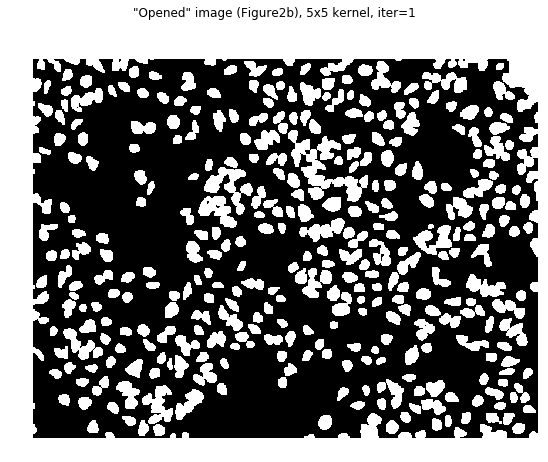

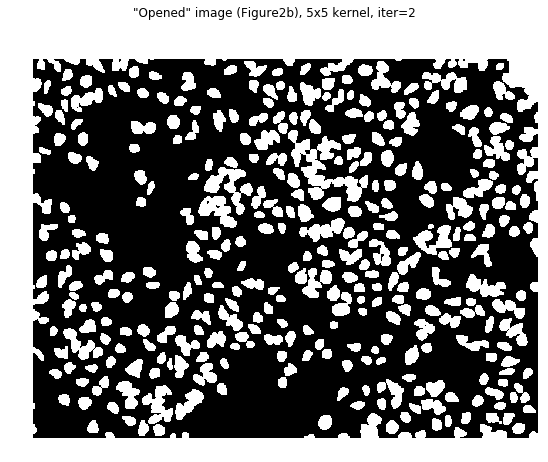

In [44]:
# 'OPENING' the image; trying to seperate overlapping cells

kernel       = np.ones((5,5), np.uint8)
image_opened = cv2.erode(thresh,kernel, iterations=1)
image_opened = cv2.dilate(image_opened, kernel, iterations=1)
                         

image_opened_2 = cv2.erode(thresh,kernel, iterations=2)
image_opened_2 = cv2.dilate(thresh,kernel, iterations=1)
    
    
# Plot "opened" image
                         
import matplotlib.pylab as plt
# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]


# Plot the images
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


plt.axis("off")
plt.suptitle('"Opened" image (Figure2b), 5x5 kernel, iter=1')
plt.imshow(image_opened, cmap='gray')
plt.show()


plt.axis("off")
plt.suptitle('"Opened" image (Figure2b), 5x5 kernel, iter=2')
plt.imshow(image_opened, cmap='gray')
plt.show()


Opening the image didn't make much of a difference in terms of separating the clustered cells, so we will omit this step, for the sake of staying true to the original cell dimensions. A grid search could be performed to optimally tune the parameters `kernel size`, `number of iterations` per dilation/erosion, but this should be done with caution so as we won't overfit for the given example image.

## 2. Contour detection for identifying number of cells, centroids and surface area

We will now proceed with the __contour detection__, to find the closed cell outlines. It's important to note again that we expect less cells detected than there actually are in the picture, since the clustered overlapping cells will share just one contour. We will use the built-in `OpenCV` function `findContours` with the binary thresholded image from the previous step, as input. We will choose to have returned only the external contours, since we don't want a nucleus contour for example to be counted as an extra cell. We will also retrieve the centroid, or center of mass for each contour by calling the function `cv2.moments` and the area of each contour with the help of the `contourArea` function. While looping over each detected contour, the centroid coordinates and area of the contour will be stored in two lists, named `contourCentroid_map` and `contourArea_map` respectively. We will also draw the outlines of the cells that where found in the threshlded image, onto the original BGR image, using the `cv2.drawContours` function, while also drawing the centroid and the index number that the cell (or contour) was detected.

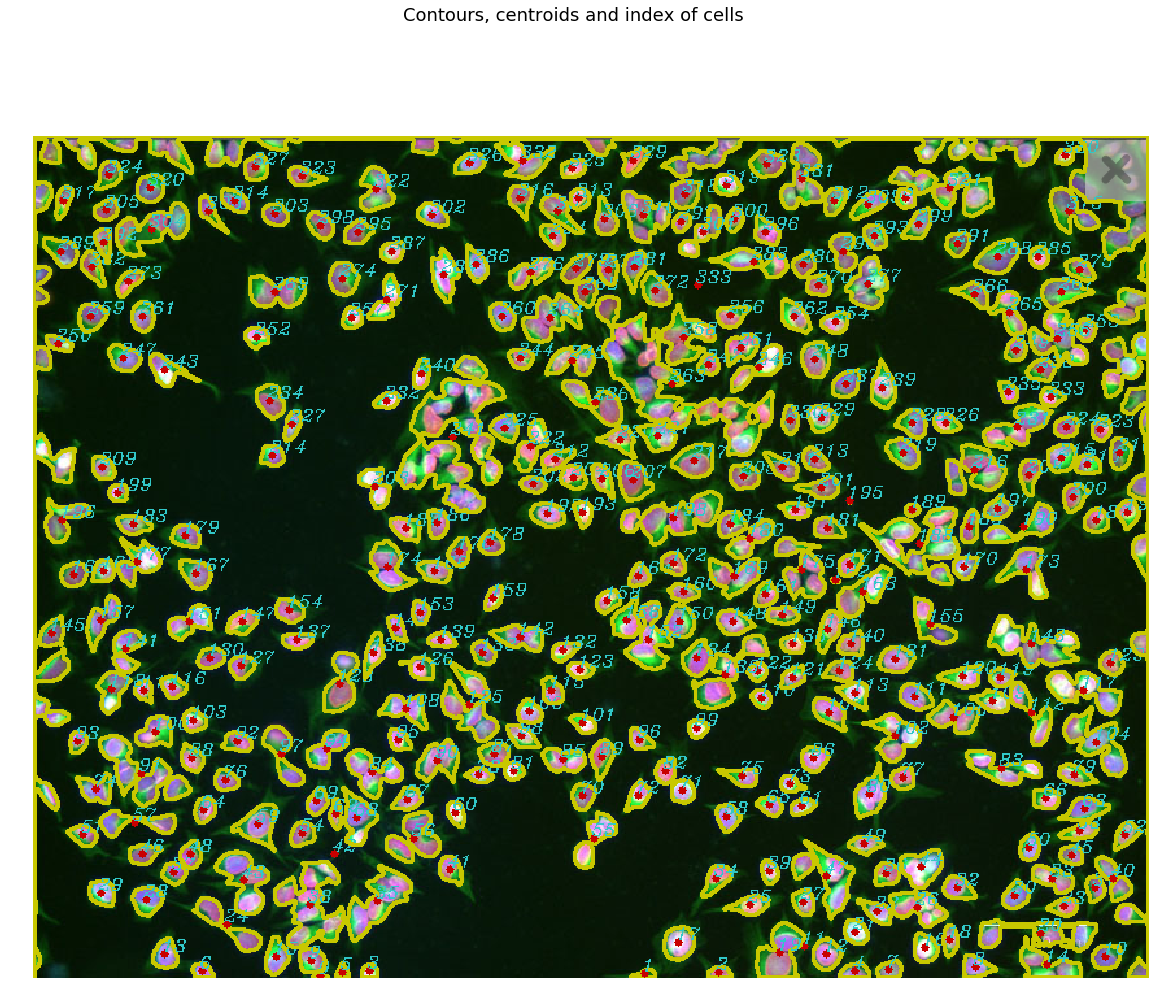

In [59]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# create a copy of the image to draw contours on
img_with_contours = img.copy()


# loop over the contours and create two maps:
contourCentroid_map = []
contourArea_map     = []

for i in range(0, len(cnts)):
    # compute the centroid of the contour
    M = cv2.moments(cnts[i])
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # Store the ith contour's centroid coordinates as a tuple in the list named `contourCentroid_map`
    centroid_coordinates = (cX, cY)
    contourCentroid_map.append(centroid_coordinates)

    # Store the ith contour's area in the list named `contourArea_map`   
    area = cv2.contourArea(cnts[i])
    contourArea_map.append(area)
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(img_with_contours, [cnts[i]], -1, (0, 200, 200), 2)
    cv2.circle(img_with_contours, (cX, cY), 3 , (0, 0, 200), -1)
    cv2.putText(img_with_contours, str(i), (cX - 2, cY - 2), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 0.45, (200, 200, 50), 1)

import matplotlib.pylab as plt
# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]


# Plot the images
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size


plt.axis("off")
plt.suptitle('Contours, centroids and index of cells', size = 18)
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB)) 
plt.savefig( str(input_dir) +'Contours_and_centroids')

plt.show()



### Number of cells detected

We can see how many cells were counted by our script, by printing the number of contours. The original image includes more than 400 cells.

In [60]:
print("Number of cells detected:", len(cnts))

Number of cells detected: 334


Due to overlapping cells, the cell count was __334__ instead of approxiamtely __400__, which was expected after inspecting the thresholded image. More eloquent heuristics should be employed in order to have a more accurate estimation of the cell count.

## 3. Crop and save each detected contour

We will now proceed and crop each detected cell/contour, and save the cropped image along with the contour index, centroid coordinates and area of contour information as filename. 

In [80]:
# FUNCTION TO CROP MIN RECTANGLE AROUND IDENTIFIED CONTOUR
import cv2
import numpy as np

def crop_minAreaRect(img, rect):  #returns rotated bounting ractangle around contour

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect = (rect[0], rect[1], 0.0)
    box = cv2.boxPoints(rect)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

    
# Call the function crop_minAreaRect while looping over each detectedd contour
## original_image =  cv2.imread(img_path)
# Looping over each contour and saving cropped image to input_dir
#for i in range(0, len(cnts)):
    
#    try:
    
#        rect = cv2.minAreaRect(cnts[i])
        
      ##  img_croped = crop_minAreaRect(img_with_contours, rect) ##comment in for output
        
#        import matplotlib.pylab as plt
#        plt.figure()     
#        plt.title('Cell with index = ' + str(i) + ', centroid = (' + str(contourCentroid_map[i][0]) + ',' + str(int(contourCentroid_map[i][1])) + '), area = ' + str(contourArea_map[i]), size = 14, loc = 'center')

#        plt.imshow(cv2.cvtColor (img_croped, cv2.COLOR_BGR2RGB))
#        plt.savefig( str(input_dir) +'cell_index_' + str(i) + 'cX_' + str(contourCentroid_map[i][0]) + '_cY_' + str(contourCentroid_map[i][1]) + '_area_' + str(contourArea_map[i]) + '.png', dpi= 400, bbox_inches = 0) # lose the unecessary padding/frame
#        #plt.show()
#    except:
#        pass


C:\Users\bruno\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Example cropped image for cell with index 74:

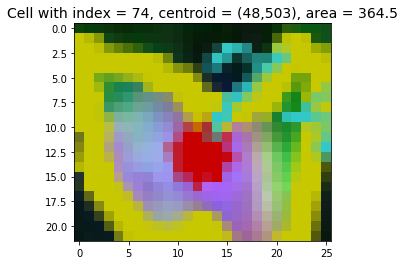

In [69]:
i = 74

rect = cv2.minAreaRect(cnts[i])

# crop
img_croped = crop_minAreaRect(img_with_contours, rect)

# show
# show
import matplotlib.pylab as plt

# Create a new figure
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]


# Plot the images
# Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size


#plt.subplot(2, 1 , 1)
plt.title('Cell with index = ' + str(i) + ', centroid = (' + str(contourCentroid_map[i][0]) + ',' + str(int(contourCentroid_map[i][1])) + '), area = ' + str(contourArea_map[i]), size = 14, loc = 'center')

#plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
#plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor (img_croped, cv2.COLOR_BGR2RGB))
plt.savefig( str(input_dir) +'cell_index_' + str(i) + 'cX_' + str(contourCentroid_map[i][0]) + '_cY_' + str(contourCentroid_map[i][1]) + '_area_' + str(contourArea_map[i]) + '.png', dpi= 400, bbox_inches = 0) # lose the unecessary padding/frame
plt.show()

Using the function `crop_minAreaRect` we cropped and saved all detected outlines in the `input_dir`. The quality of the cropped image depends on the size of the input image, thus with higher resolution images we should expect slightly better results. The greatest challenge in the task of cell counting is to address overlapping cells which are responsible for an underestimation of the total cell count. Application of a more sophisticated filtering approach would probably improve the contour detection results for the current image.

###  Version info

The current report has been created using the Jupyter Notebook with reproducibility and literate programming in mind. We report in the following lines the necessary information in order to assure that the notebook can be re-used and output the same results.

In [70]:
import platform
platform.python_version()

'3.6.3'

In [71]:
! python --version 

Python 3.6.3 :: Anaconda custom (64-bit)


In [72]:
! jupyter --version

4.3.0


### Library dependencies and versions:

In [73]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import skimage
import imutils
import sklearn
import cv2

for module in (np, sp, mpl, skimage, imutils, sklearn, cv2):
    print(module.__name__, module.__version__)

numpy 1.13.3
scipy 0.19.1
matplotlib 2.1.0
skimage 0.13.0
imutils 0.4.5
sklearn 0.19.1
cv2.cv2 3.4.0


The __image__ used for the current report can be downloaded from the following link: <br>
https://www.dropbox.com/s/f5fkfaosfbaauqo/Figure2b.PNG